In [ ]:
import pyautogui
import opencv # is needed to use confidence in PyAutoGui for image recognition
import subprocess
import time
from timeit import default_timer as timer # to log the time it takes the bot for each step
import getpass # to get the user name

username =getpass.getuser() # to log the user name on which system the bot is running

start = timer() #start the timing

subprocess.Popen("C:\Program Files (x86)\SAP\FrontEnd\SAPgui\saplogon.exe") # open your desktop application, eg SAP
time.sleep(3) # using any kind of gui scripting requires to wait until application screens are fully loaded

Customse16n = pyautogui.locateOnScreen('Custom SE16N.png',confidence=0.8) # let PyAutoGui search the image on the screen; image must be at least very similar when using confidence 80%. Use confidence 1 when image must match 100%.
pyautogui.moveTo(Customse16n) # moves your cursor upon this button
pyautogui.click(clicks=2) # double click on the button on which the mouse cursor is now located
time.sleep(3) #give a three seconds break within the code to wait for the desktop application to load its programme

pyautogui.typewrite('WhatEverSapTable', interval=0.001)  # text entering with 0.001 seconds in between entering each character
pyautogui.press('enter') # presses the enter button
pyautogui.keyDown('fn') # holding FN down so F8 can run on my marc
pyautogui.press('f8') # execute your SAP transaction with F8 works only if you also press FN, see above line
time.sleep(3)

pyautogui.press('f6') #now getting variant in SAP
time.sleep(3)
pyautogui.typewrite('WhatEverSapTable variant', interval=0.001)
pyautogui.press('enter')
time.sleep(3)
pyautogui.keyDown('fn')
pyautogui.press('f8') 
time.sleep(10) # getting your table via SE16N might take some time in SAP

exportresult = pyautogui.locateOnScreen('export.png',confidence=0.8) # click the export button to save the results
pyautogui.moveTo(exportresult)
pyautogui.click()
time.sleep(3)

pyautogui.move(0, 140) # from this export button, we now move the cursor 140 pixel down to "Local File" to save it as text
time.sleep(3)
pyautogui.click()
time.sleep(10) # might take some time depending on the amount of data
pyautogui.press('enter') # press enter to confirm
time.sleep(10)

pyautogui.typewrite('contacts.txt', interval=0.001) # saves the file contacts as txt
time.sleep(3)
pyautogui.press('enter')

end = timer() # end the timing
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('LogBot.txt', 'a', encoding='utf-8') as f: # 'a'instead of 'w', so current log will be added, not overwritten
    f.write(' > ' + 'BotExport: ' +timestr  + ': Bot for ' + username + ': %0.2fs'% (end - start)+'.' + '\n') 

In [6]:
# Data processing
import pandas as pd

start = timer() #start the timing

df = pd.read_csv('contacts.txt', delimiter = "\t")

# create a df including only valid contacts
ValidDf=df.query('Valid == "y"') 

# group per Company Name and save each group as xlsx attaching the Company Name to the file's name
for i, (name, group) in enumerate(ValidDf.groupby('Company Name')):
    group.to_excel('ValidContactsPerCompany {}.xlsx'.format(name),index=False) 

end = timer() # end the timing
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('LogBot.txt', 'a', encoding='utf-8') as f: 
    f.write(' > ' + 'BotFileCreate: ' +timestr  + ': Bot for ' + username + ': %0.2fs'% (end - start)+'.' + '\n') 

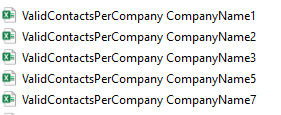

In [6]:
import glob # glob module is used to retrieve files or pathnames matching specified patterns

start = timer()

path = r'C:\Users\jesko.rehberg'
all_files = glob.glob(path + "\ValidContactsPerCompany*.xlsx") # use all Excel files which strings starts with ValidContactsPerCompany

li = [] # empty list that will be filled below

for filename in all_files:
    DfFromFiles = pd.read_excel(filename) 
    li.append(DfFromFiles)

frame = pd.concat(li, axis=0, ignore_index=True) # concat the list into one df
#frame.head(20)

end = timer() # end the timing
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('LogBot.txt', 'a', encoding='utf-8') as f: 
    f.write(' > ' + 'BotDfCreate: ' +timestr  + ': Bot for ' + username + ': %0.2fs'% (end - start)+'.' + '\n') 

,First Name,Last Name,Company Name,Role in Company,Address,Email,Phone Number,Valid
0,FirstName1,LastName1,CompanyName1,Role1,Address1,Email1,PhoneNr1,y
1,FirstName4,LastName4,CompanyName1,Role4,Address4,Email4,PhoneNr4,y
2,FirstName9,LastName9,CompanyName1,Role9,Address9,Email9,PhoneNr9,y
3,FirstName2,LastName2,CompanyName2,Role2,Address2,Email2,PhoneNr2,y
4,FirstName3,LastName3,CompanyName3,Role3,Address3,Email3,PhoneNr3,y
5,FirstName6,LastName6,CompanyName3,Role6,Address6,Email6,PhoneNr6,y
6,FirstName5,LastName5,CompanyName5,Role5,Address5,Email5,PhoneNr5,y
7,FirstName10,LastName10,CompanyName5,Role10,Address10,Email10,PhoneNr10,y
8,FirstName7,LastName7,CompanyName7,Role7,Address7,Email7,PhoneNr7,y
9,FirstName8,LastName8,CompanyName7,Role8,Address8,Email8,PhoneNr8,y


In [ ]:
# SQL Server Connection
import pyodbc # to write data to data warehouse instead of text or Excel files

start = timer()

YourTableName ='YourTableNameIncludingLayer'

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=YourSqlServer;'
                      'Database=YourDatabase;'
                      'Trusted_Connection=yes;')
# Create Table
cursor.execute('CREATE TABLE YourTableNameIncludingLayer ([First Name]  nvarchar(255),[Last Name]  nvarchar(255),[Company Name]  nvarchar(255),[Role in Company]  nvarchar(255),[Address]  nvarchar(255),[Email] nvarchar(255), [Phone Number]   nvarchar(255), [Valid] nvarchar(255))')

insert_to_tmp_tbl_stmt = f"INSERT INTO {YourTableName} VALUES (?,?,?,?,?,?,?,?)" # one ? for each column
cursor = conn.cursor()
cursor.fast_executemany = True
cursor.executemany(insert_to_tmp_tbl_stmt, frame.values.tolist())
print(f'{len(frame)} rows inserted to the {YourTableName} table') # log
cursor.commit()
cursor.close() 
conn.close()

end = timer() # end the timing
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('LogBot.txt', 'a', encoding='utf-8') as f: 
    f.write(' > ' + 'BotDbInsert: ' +timestr  + ': Bot for ' + username + ': %0.2fs'% (end - start)+'.' + '\n') 

In [8]:
# Cross check so see if all Companies are included in our exported data
start = timer()

CompanyInScope= pd.read_excel(r'C:\Users\jesko.rehberg\CompanyInScope.xlsx')
framenew=frame.loc[frame['Company Name'].isin(CompanyInScope['Company Name'])] 
# look if there any company names listed which do not exist in our export
CompanyExpected = pd.Index(CompanyInScope['Company Name'])
CompanyExported = pd.Index(framenew['Company Name'])
#print(CompanyExpected.difference(CompanyExported).values)

end = timer() # end the timing
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('LogBot.txt', 'a', encoding='utf-8') as f: 
    f.write(' > ' + 'BotCheck: ' +timestr  + ': Bot for ' + username + ': %0.2fs'% (end - start)+'.' + '\n') 

['CompanyName8']


In [ ]:
# Send mail: we can see that for whatever reasons CompanyName8 is not included in our list. We want the bot to send this information to our colleague, so it can be looked at in more detail (maybe bad master data update etc)
start = timer()

FindOutlookPath =r"C:\Program Files (x86)\Microsoft Office\root\Office16\OUTLOOK.EXE"
FindOutlook = subprocess.Popen(FindOutlookPath)
time.sleep(3)

NewMail = pyautogui.locateOnScreen('Neue.png',confidence=0.8) # Neue stands for New in German
#print(NewMail)
pyautogui.moveTo(NewMail)
pyautogui.click()

time.sleep(1)
To = pyautogui.locateOnScreen('An.png',confidence=0.8) # An stands for To in German
#print(To)
pyautogui.moveTo(To)
pyautogui.move(90, 0) # von diesem Bild geht es 90 pixel nach rechts für das Adressatenfeld
pyautogui.click()
pyautogui.typewrite('YourColleaguesMailAddress', interval=0.00001)

time.sleep(1)
Cc = pyautogui.locateOnScreen('Cc.png',confidence=0.8)
#print(Cc)
pyautogui.moveTo(Cc)
pyautogui.move(90, 0) # von diesem Bild geht es 90 pixel nach rechts für das Adressatenfeld
pyautogui.click()
pyautogui.typewrite('YouOnCc', interval=0.00001)

time.sleep(1)
Subject = pyautogui.locateOnScreen('Betreff.png',confidence=0.8) # Betreff stands for Subject in German
#print(Subject)
pyautogui.moveTo(Subject)
pyautogui.move(90, 0) # von diesem Bild geht es 90 pixel nach rechts für das Adressatenfeld
pyautogui.click()
pyautogui.typewrite('Data Validation ERP', interval=0.00001)

time.sleep(1)
Signature = pyautogui.locateOnScreen('Signatur.png',confidence=0.8) #Signatur stands for Signature in German
#print(Signature)
pyautogui.moveTo(Signature)
pyautogui.move(0, -150) # from Signature, move 150 pixels top to insert the mail's body above the signature
pyautogui.click()
pyautogui.typewrite('Hi colleague, our bot found a company which is currently missing in our ERP master data: '+str(CompanyExpected.difference(CompanyExported).values), interval=0.00001)

end = timer() # end the timing
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('LogBot.txt', 'a', encoding='utf-8') as f: 
    f.write(' > ' + 'BotMailSend: ' +timestr  + ': Bot for ' + username + ': %0.2fs'% (end - start)+'.' + '\n') 

In [ ]:
# RPA writes a log as default
# Using RPA you can still control mouse
import rpa as r
start = timer()

r.init(turbo_mode = True) # to run in quick mode
r.url('http://rpachallenge.com') # open this website to fill in forms

# timer starts after running this step
r.click('//*[text()="Start"]')

# loop through and fill in all fields
for i in range(len(frame.axes[0])):
    r.type('//*[@ng-reflect-name="labelFirstName"]', frame['First Name'][i])
    r.type('//*[@ng-reflect-name="labelLastName"]', frame['Last Name'][i])
    r.type('//*[@ng-reflect-name="labelCompanyName"]', frame['Company Name'][i])
    r.type('//*[@ng-reflect-name="labelRole"]', frame['Role in Company'][i])
    r.type('//*[@ng-reflect-name="labelAddress"]', frame['Address'][i])
    r.type('//*[@ng-reflect-name="labelEmail"]', frame['Email'][i])
    r.type('//*[@ng-reflect-name="labelPhone"]', frame['Phone Number'][i])
    r.click('//*[@value="Submit"]')

# take a screenshot after all forms are filled in, which can also be used as a kind of log file
r.snap('page', 'score.png')
r.wait(10)
r.close()
# check the rpa log in this folder: rpa_python

end = timer() # end the timing
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('LogBot.txt', 'a', encoding='utf-8') as f: 
    f.write(' > ' + 'BotWebFormFill: ' +timestr  + ': Bot for ' + username + ': %0.2fs'% (end - start)+'.' + '\n') 